<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [2]:
#Importation de la librairie Pandas
import pandas as pd


In [3]:
import numpy as np

In [4]:
import matplotlib as plt

In [5]:
import seaborn as sns


In [6]:
#Importation de la librairie plotly express
import plotly_express as px

In [640]:
import openpyxl 

In [693]:
import plotly.graph_objs as go

In [7]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [8]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("/Users/helmisaddem/Downloads/Data-Bottleneck/web.xlsx")


/usr/local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [9]:
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("/Users/helmisaddem/Downloads/Data-Bottleneck/erp.xlsx")
#importation du fichier liaison.xlsx


In [10]:
df_liaison = pd.read_excel("/Users/helmisaddem/Downloads/Data-Bottleneck/liaison.xlsx")


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [11]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [12]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


In [13]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [14]:
#Vérifier s' il y a les lignes en doublons dans la colonne product_id: Non 
df_erp['product_id'].duplicated(keep='first').sum()

0

In [15]:
#Afficher les valeurs distinctes de la colonne stock_status
#À quelle(s) autre(s) colonne(s) sont-elles liées ? : stock_quantity

df_erp['stock_status'].unique()

array(['instock', 'outofstock'], dtype=object)

In [16]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp['stock_status_2'] = np.where(df_erp['stock_quantity'] <= 0, "outofstock", "instock")

In [17]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]


#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [18]:
df_erp["verif"] = np.where(df_erp["stock_status"] == df_erp["stock_status_2"], True, False)


In [19]:
df_erp.head(10)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2,verif
0,3847,1,24.2,16,instock,12.88,instock,True
1,3849,1,34.3,10,instock,17.54,instock,True
2,3850,1,20.8,0,outofstock,10.64,outofstock,True
3,4032,1,14.1,26,instock,6.92,instock,True
4,4039,1,46.0,3,outofstock,23.77,instock,False
5,4040,1,34.3,12,instock,18.25,instock,True
6,4041,1,32.7,12,instock,17.57,instock,True
7,4042,1,31.2,15,instock,15.48,instock,True
8,4043,1,60.0,0,outofstock,29.45,outofstock,True
9,4045,1,42.6,5,instock,22.01,instock,True


In [20]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset

In [21]:
df_erp["verif"].sum()

823

In [22]:
df_erp.loc[df_erp["verif"]== False]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2,verif
4,4039,1,46.0,3,outofstock,23.77,instock,False
398,4885,1,18.7,0,instock,9.66,outofstock,False


In [23]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3


In [24]:
#Corriger la ou les données incohérentes
df_erp["stock_status"] = np.where(df_erp['stock_quantity'] <= 0, "outofstock", "instock")

#Verification en utilisant le même code que plus haut pour afficher les problemes


In [25]:
df_erp["verif"] = np.where(df_erp["stock_status"] == df_erp["stock_status_2"], True, False)

In [26]:
len(df_erp.loc[df_erp["verif"]== False])

0

In [27]:
df_erp["verif"].sum()

825

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [28]:
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2,verif
0,3847,1,24.2,16,instock,12.88,instock,True
1,3849,1,34.3,10,instock,17.54,instock,True
2,3850,1,20.8,0,outofstock,10.64,outofstock,True
3,4032,1,14.1,26,instock,6.92,instock,True
4,4039,1,46.0,3,instock,23.77,instock,True


In [ ]:
df_erp.loc[(df_erp['price'].isna())]['price'].count()

0

In [144]:
df_erp.loc[(df_erp['price'] <=0)]['price'].count()

0

In [138]:
#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?) : prendre l'opposé ? 
df_erp.loc[df_erp['price'] < 0]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
151,4233,0,-20.0,0,outofstock,10.33
469,5017,0,-8.0,0,outofstock,4.34
739,6594,0,-9.1,19,instock,4.61


In [139]:
df_erp["price"] = np.where(df_erp['price'] < 0, df_erp['price']*(-1), df_erp['price'])

In [140]:
df_erp.loc[df_erp['price'] < 0]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price


In [154]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(df_erp['price'].isna().sum())) #Saisir l'instruction manquante dans la fonction format


Nombres d'article avec un prix non renseignés: 0


In [141]:
#Afficher le prix minimum de la colonne "price"
df_erp["price"].min()


5.2

In [143]:
#Afficher le prix maximum de la colonne "price"
df_erp["price"].max()


225.0

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [ ]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
df_erp["stock_quantity"].min()


-10

In [ ]:
#Afficher la quantité maximum de la colonne "stock_quantity"
df_erp["stock_quantity"].max()


145

In [ ]:
#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?): les remplacer par 0 ?
df_erp.loc[df_erp["stock_quantity"]<0]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2,verif
449,4973,0,10.0,-10,outofstock,4.96,outofstock,True
573,5700,1,44.5,-1,outofstock,22.30,outofstock,True


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [ ]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles? 0 si l'article n'est pas vendu sur le web, 
#1 s'il est vendu sur le web ?
df_erp['onsale_web'].unique()

array([1, 0])

In [94]:
#Quelles sont les colonnes à conserver selon vous?
df_erp.loc[df_erp['onsale_web'] == 1]['onsale_web'].count()

716

In [60]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
del df_erp["stock_status_2"]


In [61]:
del df_erp["verif"]


In [62]:
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,instock,23.77


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [147]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
df_erp["purchase_price"].isna().sum()


0

In [145]:
#Afficher le prix minimum de la colonne "purchase_price"
df_erp['purchase_price'].min()



2.74

In [ ]:
#Afficher le prix maximum de la colonne "purchase_price"
df_erp['purchase_price'].max()


137.81

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [ ]:
#Dimension du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))
#Nombre d'observations

#Nombre de caractéristiques



Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

In [32]:
#Selon vous, quelles sont les colonnes à conserver ?
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
# sku, total_sales, tax_status, post_date_gmt, product_type, post_name, post_modified_gmt, post_type


web_conserved = df_web.drop(columns=['virtual', 'downloadable', 'rating_count', 
                                     'average_rating', 'tax_class', 'post_author', 
                                     'post_date', 'post_content', 'post_title', 
                                     'post_excerpt', 'post_status', 'comment_status',
                                     'ping_status', 'post_password', 'post_modified',
                                     'post_content_filtered', 'post_parent', 'guid',
                                     'menu_order', 'post_mime_type', 'comment_count'])

In [155]:
print(df_web.duplicated(subset='sku', keep='first').sum(), "doublons dans la table web.")

798 doublons dans la table web.


In [35]:
print(len(df_web['sku'].unique()), "références produit web uniques sont présentes dans le fichier web.")

715 références produit web uniques sont présentes dans le fichier web.


In [ ]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la règle de codification?: contient des caractères autre que chiffres ?


In [ ]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?


In [184]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
identified_web_articles = web_conserved.dropna(subset=['sku']) 

In [185]:
identified_web_articles = identified_web_articles.drop_duplicates(subset='sku', keep='first', inplace=False, ignore_index=False)

In [186]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
identified_web_articles.duplicated(subset=None, keep='first').sum()

0

In [187]:
identified_web_articles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 1391
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   total_sales        714 non-null    float64       
 2   tax_status         361 non-null    object        
 3   post_date_gmt      714 non-null    datetime64[ns]
 4   product_type       714 non-null    object        
 5   post_name          714 non-null    object        
 6   post_modified_gmt  714 non-null    datetime64[ns]
 7   post_type          714 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 50.2+ KB


In [1116]:
identified_web_articles.loc[identified_web_articles["sku"] == 14736]

,sku,total_sales,tax_status,post_date_gmt,product_type,post_name,post_modified_gmt,post_type
773,14736,8.0,NaN,2019-01-31 10:58:26,Vin,gilles-robin-crozes-hermitage-rouge-1920-2016-...,2020-04-21 08:45:03,attachment


In [41]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
non_identified_articles = df_web.loc[df_web['sku'].isna()]



In [ ]:
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
non_identified_articles.info()


In [ ]:
non_identified_articles.head(43)
non_identified_articles.tail(42)

In [42]:
non_identified_articles.loc[non_identified_articles["total_sales"]<0]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1084,NaN,0,0,0,0.0,-56.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1087,NaN,0,0,0,0.0,-17.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [ ]:
#3 - Que constatez-vous?
#2 produits sans identifiants mais qui présentent des valeurs dans les colonnes total sales...

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [ ]:
#Dimension du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))
#Nombre d'observations

#Nombre de caractéristiques


Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [87]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
df_liaison.duplicated(subset='product_id', keep='first').sum()


0

In [ ]:
df_liaison['product_id'].unique().shape[0]

825

In [88]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques? NON 
df_liaison.duplicated(subset='id_web', keep='first').sum()



90

In [89]:
df_liaison['id_web'].unique().shape[0]

735

In [ ]:
#Avons-nous des articles sans correspondances? oui 


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [244]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp, df_liaison, on = 'product_id', how = 'inner')

In [182]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
 6   id_web          734 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 45.2+ KB


In [ ]:
#Y a t-il des lignes ne "matchant" pas entre les 2 fichiers? non


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [264]:
#Fusionnez les datasets df_merge et df_web
merge_web = pd.merge(identified_web_articles, df_merge, left_on = 'sku', right_on = 'id_web', how='right')

In [189]:
merge_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   total_sales        714 non-null    float64       
 2   tax_status         361 non-null    object        
 3   post_date_gmt      714 non-null    datetime64[ns]
 4   product_type       714 non-null    object        
 5   post_name          714 non-null    object        
 6   post_modified_gmt  714 non-null    datetime64[ns]
 7   post_type          714 non-null    object        
 8   product_id         825 non-null    int64         
 9   onsale_web         825 non-null    int64         
 10  price              825 non-null    float64       
 11  stock_quantity     825 non-null    int64         
 12  stock_status       825 non-null    object        
 13  purchase_price     825 non-null    float64       
 14  id_web    

In [265]:
merge_web.loc[merge_web['onsale_web'] == 1].loc[merge_web["id_web"].isna()] 

,sku,total_sales,tax_status,post_date_gmt,product_type,post_name,post_modified_gmt,post_type,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,prix_deviation,id_web
242,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,4594,1,144.0,0,outofstock,87.36,4.202,NaN
486,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,5070,1,84.7,0,outofstock,47.43,1.972,NaN
487,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,5075,1,43.3,0,outofstock,21.70,0.414,NaN


In [266]:
merge_web.loc[merge_web['onsale_web'] == 1].loc[merge_web['sku'].isna()]

,sku,total_sales,tax_status,post_date_gmt,product_type,post_name,post_modified_gmt,post_type,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,prix_deviation,id_web
242,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,4594,1,144.0,0,outofstock,87.36,4.202,NaN
486,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,5070,1,84.7,0,outofstock,47.43,1.972,NaN
487,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,5075,1,43.3,0,outofstock,21.70,0.414,NaN


In [ ]:
merge_web.loc[merge_web['onsale_web'] == 0].loc[merge_web["id_web"].isna() == False]

In [268]:
merge_web.loc[merge_web['onsale_web'] == 0].loc[merge_web["id_web"].isna() == False].loc[merge_web["sku"].isna() == False]

,sku,total_sales,tax_status,post_date_gmt,product_type,post_name,post_modified_gmt,post_type,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,prix_deviation,id_web
123,16295,14.0,NaN,2018-02-15 13:05:06,Vin,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2020-08-27 16:55:03,attachment,4200,0,5.8,33,instock,3.12,-0.996,16295


In [257]:
merge_web.loc[merge_web['onsale_web'] == 1]

,sku,total_sales,tax_status,post_date_gmt,product_type,post_name,post_modified_gmt,post_type,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,prix_deviation,id_web
0,15298,6.0,taxable,2018-02-08 11:58:52,Vin,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 08:30:29,product,3847,1,24.2,16,instock,12.88,-0.304,15298
1,15296,9.0,taxable,2018-02-08 12:49:41,Vin,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 08:00:17,product,3849,1,34.3,10,instock,17.54,0.076,15296
2,15300,0.0,NaN,2018-02-08 13:08:36,Vin,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 16:15:03,attachment,3850,1,20.8,0,outofstock,10.64,-0.432,15300
3,19814,12.0,NaN,2018-02-09 13:01:05,Vin,pierre-jean-villa-igp-gamine-2018,2020-01-04 15:36:01,attachment,4032,1,14.1,26,instock,6.92,-0.684,19814
4,19815,3.0,NaN,2018-02-12 08:04:37,Vin,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 15:36:10,attachment,4039,1,46.0,3,instock,23.77,0.516,19815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,16135,9.0,taxable,2020-04-25 11:22:38,Vin,mouthes-le-bihan-aime-chai-2015,2020-08-26 15:35:03,product,6930,1,8.4,28,instock,4.34,-0.898,16135
792,15891,9.0,NaN,2020-05-02 12:53:40,Vin,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 15:35:02,attachment,7023,1,27.5,23,instock,14.21,-0.180,15891
793,15887,5.0,NaN,2020-05-02 13:00:54,Vin,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 16:15:03,attachment,7025,1,69.0,8,instock,34.22,1.381,15887
822,13127-1,4.0,taxable,2020-06-09 13:42:04,Vin,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 15:09:06,product,7247,1,54.8,6,instock,27.18,0.847,13127-1


In [ ]:
merge_web.loc[merge_web["sku"] == 16295, "onsale_web"] = 1

In [1066]:
online_product = merge_web.loc[merge_web["onsale_web"]== 1]

In [736]:
online_product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 824
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   total_sales        714 non-null    float64       
 2   tax_status         361 non-null    object        
 3   post_date_gmt      714 non-null    datetime64[ns]
 4   product_type       714 non-null    object        
 5   post_name          714 non-null    object        
 6   post_modified_gmt  714 non-null    datetime64[ns]
 7   post_type          714 non-null    object        
 8   product_id         717 non-null    int64         
 9   onsale_web         717 non-null    int64         
 10  price              717 non-null    float64       
 11  stock_quantity     717 non-null    int64         
 12  stock_status       717 non-null    object        
 13  purchase_price     717 non-null    float64       
 14  prix_deviation 

In [ ]:
online_product.loc[merge_web["product_type"]== "Huile d'olive"]

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

In [ ]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
#fig1 = sns.boxplot(data= df_erp.explode('price'), y='price', color='c')

<Axes: xlabel='price'>

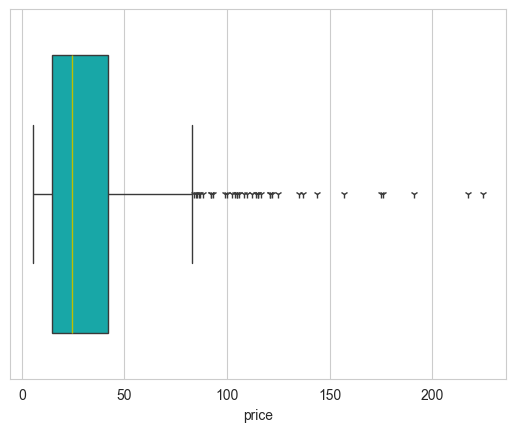

In [594]:
sns.set_style('whitegrid')
sns.boxplot(data=df_erp['price'], flierprops={"marker": "1"}, medianprops={"color" : "y"},
            orient="h", width=0.75, color="c")




In [157]:
#Autre méthode avec plotly express
fig = px.box(data_frame= df_erp, y='price')

In [158]:
fig.update_layout(height=600, width=300)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [ ]:
#representation des prix sous forme de diagramme en barre pour montrer que çà ne suit pas la loi normale

plt.xlabel('quantité en stock', fontweight='bold', fontsize='12')
plt.ylabel('Nombre de vins', fontweight='bold', fontsize='12')
n = df_erp['stock_quantity'].count()
K1 = np.percentile(df_erp['stock_quantity'], 25)
K3 = np.percentile(df_erp['stock_quantity'], 75)
# calculate bin width for histogram (Freedman-Diaconis rule)
bin_width = 2*((K3-K1)/np.cbrt(n))
# calculate number of bins for histogram
nb_bins = round(((df_erp['stock_quantity'].max() - df_erp['stock_quantity'].min())/ bin_width))
plt.pyplot.hist(df_erp['stock_quantity'], bins=nb_bins, color='tomato')
plt.pyplot.xlabel('Prix de vente en €', fontsize='12')
plt.pyplot.ylabel('Nombre de produits vendus', fontsize='12')

In [737]:
#Calculer la moyenne du prix 
moy_prix = round(df_erp['price'].mean(),2)



In [220]:
#Calculer l'écart-type du prix
ecart_type_prix = round(np.std(df_erp['price']),3)


In [224]:
#Calculer le Z-score : de chaque valeur de prix 
df_erp["prix_deviation"] = round(((df_erp["price"] - moy_prix)/ecart_type_prix),3)

In [225]:
df_erp.loc[df_erp["prix_deviation"]>3]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,prix_deviation
208,4352,1,225.0,0,outofstock,137.81,7.249
227,4402,1,176.0,11,instock,78.25,5.406
230,4406,1,157.0,12,instock,69.08,4.691
242,4594,1,144.0,0,outofstock,87.36,4.202
411,4904,1,137.0,9,instock,67.95,3.939
460,5001,1,217.5,18,instock,116.87,6.967
556,5612,1,124.8,19,instock,66.41,3.480
598,5767,1,175.0,12,instock,90.42,5.368
635,5892,1,191.3,98,instock,116.06,5.981
651,5917,1,122.0,12,instock,54.24,3.375


In [226]:
len(df_erp.loc[df_erp["prix_deviation"]>3])

17

In [230]:
#Quel est le seuil prix dont z-score est supérieur à 3? : z = 3 ==> ((prix_seuil - moy_prix) / ecart_type_prix) = 3
#==> prix_seuil = 3 * ecart_type_prix + moy_prix

prix_seuil = (3 * ecart_type_prix) + moy_prix

In [672]:
print(prix_seuil)


112.041


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [212]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_erp.describe()

,product_id,onsale_web,price,stock_quantity,purchase_price
count,825.000000,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.867879,32.277636,21.589091,16.940582
std,902.644635,0.338828,26.603196,21.933807,14.561840
min,3847.000000,0.000000,5.200000,-10.000000,2.740000
25%,4348.000000,1.000000,14.500000,7.000000,7.590000
50%,4907.000000,1.000000,24.300000,18.000000,12.710000
75%,5805.000000,1.000000,42.000000,30.000000,22.020000
max,7338.000000,1.000000,225.000000,145.000000,137.810000


In [196]:
Q1 = np.percentile(df_erp['price'], 25)


In [197]:
np.percentile(df_erp['price'], 25)

14.5

In [200]:
Q3 = np.percentile(df_erp['price'], 75)



In [198]:
np.percentile(df_erp['price'], 75)

42.0

In [201]:
IQ = Q3 - Q1

In [214]:
#Définissez un seuil pour les articles "outliers" en prix
top_whisker = Q3 + IQ*1.5
print("La valeur maximale de la boite moustache:", top_whisker, "€")

La valeur maximale de la boite moustache: 83.25 €


In [207]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"

erp_outliers = df_erp.loc[df_erp['price'] > top_whisker]


In [689]:
len(erp_outliers)

36

In [ ]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [275]:
online_product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 824
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   total_sales        714 non-null    float64       
 2   tax_status         361 non-null    object        
 3   post_date_gmt      714 non-null    datetime64[ns]
 4   product_type       714 non-null    object        
 5   post_name          714 non-null    object        
 6   post_modified_gmt  714 non-null    datetime64[ns]
 7   post_type          714 non-null    object        
 8   product_id         717 non-null    int64         
 9   onsale_web         717 non-null    int64         
 10  price              717 non-null    float64       
 11  stock_quantity     717 non-null    int64         
 12  stock_status       717 non-null    object        
 13  purchase_price     717 non-null    float64       
 14  prix_deviation 

In [1115]:
online_product.loc[online_product["product_type"] == "Huile d'olive"]

,sku,total_sales,tax_status,post_date_gmt,product_type,post_name,post_modified_gmt,post_type,product_id,onsale_web,...,stock_quantity,stock_status,purchase_price,prix_deviation,id_web,product_repres_color,ca_par_article,duree_stockage_en_mois,PVHT,taux_marge_%
709,7033,5.0,NaN,2019-03-13 12:44:44,Huile d'olive,huile-olive-planeta-3l,2020-08-27 12:55:02,attachment,5756,1,...,9,instock,25.85,0.373,7033,olive,211.0,2.0,35.17,26.50
710,11258,7.0,NaN,2019-03-13 13:02:06,Huile d'olive,huile-dolive-extra-vierge-planeta-50cl,2020-08-19 08:55:02,attachment,5760,1,...,24,instock,8.43,-0.721,11258,olive,91.7,3.0,10.92,22.80
711,13849,10.0,taxable,2019-03-13 13:05:40,Huile d'olive,huile-dolive-extra-vierge-planeta-3x-10cl,2019-05-28 15:00:02,product,5761,1,...,125,instock,12.07,-0.481,13849,olive,195.0,12.0,16.25,25.72


In [1065]:
#Definir une couleur pour chaque produit qui sera utilisé comme code couleur dans les graphes 
list = [["Vin", "peachpuff"], ["Champagne", "burlywood"], 
        ["Cognac", "firebrick"], ["Gin", "cornflowerblue"], ["Huile d'olive", "olive"],
        ["Whisky", "sandybrown"], ["Autre", "cadetblue"]]
new_df = pd.DataFrame(list, columns =['product_type', 'product_repres_color'], dtype = 'string')

In [1067]:
online_product = pd.merge(online_product, new_df, on= 'product_type', how='inner')

In [1068]:
#online_product["post_name"] = online_product["post_name"].astype('string')

In [1069]:
##############################
# Calculer le CA sur site web #
##############################

#Créez une colonne calculant le CA par article
online_product["ca_par_article"] = online_product["total_sales"] * online_product["price"]

In [1022]:
#Calculez la somme de la colonne "ca_par_article"
chiffre_affaire = round(online_product["ca_par_article"].sum(), 2)
print("les ventes du sites web ont réalisé un CA de", chiffre_affaire)
#Ce résultat correspond au chiffre d'affaire du site web
# on utilise la table online_product: 


les ventes du sites web ont réalisé un CA de 153748.1


In [1070]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge

sorted_online_product = online_product.sort_values(by="ca_par_article", ascending=False)

In [1071]:
#Réinitialiser l'index du dataset par un reset_index
sorted_online_product.reset_index()

,index,sku,total_sales,tax_status,post_date_gmt,product_type,post_name,post_modified_gmt,post_type,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,prix_deviation,id_web,product_repres_color,ca_par_article
0,665,1366,116.0,NaN,2018-02-13 12:45:31,Champagne,champagne-mailly-grand-cru-intemporelle-2010,2020-08-26 16:05:02,attachment,4150,1,59.0,123,instock,35.45,1.005,1366,burlywood,6844.0
1,671,15940,11.0,NaN,2018-03-02 09:30:04,Champagne,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 10:18:45,attachment,4352,1,225.0,0,outofstock,137.81,7.249,15940,burlywood,2475.0
2,284,14950,122.0,NaN,2018-04-18 09:53:51,Vin,francois-baur-pinot-noir-schlittweg-2017,2020-05-06 09:35:01,attachment,4726,1,12.7,0,outofstock,6.82,-0.736,14950,peachpuff,1549.4
3,401,15346,22.0,NaN,2018-07-31 09:49:05,Vin,albert-mann-pinot-noir-grand-h-2017,2020-02-13 16:00:01,attachment,5067,1,59.9,3,instock,30.95,1.039,15346,peachpuff,1317.8
4,406,14561,111.0,NaN,2018-09-01 13:34:55,Vin,argentine-mendoza-alamos-torrontes-2017,2020-07-11 12:00:03,attachment,5379,1,11.1,33,instock,5.68,-0.797,14561,peachpuff,1232.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,410,14149,0.0,NaN,2018-09-01 13:58:23,Vin,liban-vallee-de-la-bekaa-chateau-marsyas-2012,2020-04-01 07:30:06,attachment,5384,1,28.8,0,outofstock,15.18,-0.131,14149,peachpuff,0.0
710,492,14241,0.0,NaN,2019-01-31 13:57:35,Vin,albert-mann-gewurztraminer-vendanges-tardives-...,2019-08-09 09:50:03,attachment,5712,1,57.6,0,outofstock,30.36,0.952,14241,peachpuff,0.0
711,211,14372,0.0,taxable,2018-04-13 14:03:28,Vin,alphonse-mellot-sancerre-rouge-la-moussiere-2014,2020-08-27 07:30:05,product,4618,1,30.6,0,outofstock,16.44,-0.063,14372,peachpuff,0.0
712,200,15149,0.0,NaN,2018-04-13 12:19:27,Vin,catherine-et-claude-marechal-volnay-2017,2020-06-13 13:55:03,attachment,4606,1,50.1,0,outofstock,24.59,0.670,15149,peachpuff,0.0


In [1072]:
#Afficher les 20 premier articles en CA
sorted_online_product_20 = sorted_online_product.head(20)


In [ ]:
#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(sorted_online_product_20, x= range(1,21), y="ca_par_article", title='Top 20 des produits qui réalisent les meilleurs CA', color=range(1,21))
fig.update_traces(texttemplate = sorted_online_product_20["product_type"], textposition = "inside", textfont=dict(size=12),
                  marker_color='mediumseagreen')
fig.update_layout(xaxis_title="Produit", width=800, height=500, bargap=0.05)
fig.show()


In [1114]:
fig4 = go.Figure(data=go.Bar(
    x=sorted_online_product_20['post_name'],
    y=sorted_online_product_20['ca_par_article'],
    marker=dict(
        color=sorted_online_product_20['product_repres_color'],  # Color based on the 'product_type' column     
   )),
                 layout_title_text="Top 20 des produits qui réalisent les meilleurs CA")

fig4.update_layout(
        width=800,
        height=600)
fig4.update_layout(
xaxis = dict(
tickfont = dict(size=9)))
fig4.update_yaxes(title_text="Chiffre d'affaire par produit")
fig4.update_layout()



In [1074]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
sorted_online_product["part_CA"] = sorted_online_product["ca_par_article"] / chiffre_affaire

In [1075]:
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
sorted_online_product["somme_cumul"] = sorted_online_product["part_CA"].cumsum()


In [1076]:
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
len(sorted_online_product.loc[sorted_online_product["somme_cumul"]<=0.8])
print("les articles dont les ventes représentent 80% du CA sont au nombre de", len(sorted_online_product.loc[sorted_online_product["somme_cumul"]<=0.8]))


les articles dont les ventes représentent 80% du CA sont au nombre de 420


In [1077]:
#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web
round(len(sorted_online_product.loc[sorted_online_product["somme_cumul"]<=0.8])/len(online_product), 2)

0.59

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [ ]:
#####################################
# Palmares des articles en quantité #
#####################################
online_product.info()


In [1078]:
#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
sorted_product_quantity = online_product.sort_values(by="total_sales", ascending=False)


In [1079]:
#Réinitialiser l'index du dataset par un reset_index
sorted_product_quantity = sorted_product_quantity.reset_index()


In [1080]:
#Afficher les 20 premier articles en quantité
sorted_product_quantity.head(20)


,index,sku,total_sales,tax_status,post_date_gmt,product_type,post_name,post_modified_gmt,post_type,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,prix_deviation,id_web,product_repres_color,ca_par_article
0,284,14950,122.0,NaN,2018-04-18 09:53:51,Vin,francois-baur-pinot-noir-schlittweg-2017,2020-05-06 09:35:01,attachment,4726,1,12.7,0,outofstock,6.82,-0.736,14950,peachpuff,1549.4
1,665,1366,116.0,NaN,2018-02-13 12:45:31,Champagne,champagne-mailly-grand-cru-intemporelle-2010,2020-08-26 16:05:02,attachment,4150,1,59.0,123,instock,35.45,1.005,1366,burlywood,6844.0
2,406,14561,111.0,NaN,2018-09-01 13:34:55,Vin,argentine-mendoza-alamos-torrontes-2017,2020-07-11 12:00:03,attachment,5379,1,11.1,33,instock,5.68,-0.797,14561,peachpuff,1232.1
3,328,16148,36.0,taxable,2018-05-03 11:20:05,Vin,chateau-de-la-selve-igp-coteaux-de-lardeche-ma...,2020-08-27 07:30:15,product,4867,1,9.9,121,instock,4.86,-0.842,16148,peachpuff,356.4
4,114,15415,27.0,taxable,2018-02-15 13:33:42,Vin,mas-laval-igp-pays-herault-pampres-blanc-2018,2020-07-11 14:45:03,product,4203,1,9.9,74,instock,5.01,-0.842,15415,peachpuff,267.3
5,167,14864,24.0,taxable,2018-02-27 12:33:54,Vin,i-fabbri-chianti-classico-lamole-2017,2020-08-22 12:35:02,product,4275,1,14.9,62,instock,7.78,-0.654,14864,peachpuff,357.6
6,228,16525,22.0,taxable,2018-04-17 07:28:58,Vin,bernard-baudry-chinon-rouge-croix-boissee-2017,2020-07-31 07:31:39,product,4647,1,28.5,45,instock,14.14,-0.142,16525,peachpuff,627.0
7,401,15346,22.0,NaN,2018-07-31 09:49:05,Vin,albert-mann-pinot-noir-grand-h-2017,2020-02-13 16:00:01,attachment,5067,1,59.9,3,instock,30.95,1.039,15346,peachpuff,1317.8
8,589,14570,20.0,taxable,2019-06-28 16:01:06,Vin,moulin-de-gassac-igp-pays-dherault-guilhem-bla...,2020-08-26 13:55:02,product,6129,1,5.2,68,instock,2.74,-1.019,14570,peachpuff,104.0
9,535,15325,20.0,NaN,2019-03-27 16:59:49,Vin,agnes-levet-amethyste-2017,2020-05-21 12:00:02,attachment,5826,1,41.2,34,instock,21.71,0.336,15325,peachpuff,824.0


In [1081]:
sorted_product_quantity_20 = sorted_product_quantity.head(20)

In [1082]:
fig5 = go.Figure(data=go.Bar(
    x=sorted_product_quantity_20['post_name'],
    y=sorted_product_quantity_20['total_sales'],
   marker=dict(
        color=sorted_product_quantity_20['product_repres_color'],  # Color based on the 'product_type' column     
   )), layout_title_text="Top 20 des produits les plus vendus"
                 )


#fig5.update_xaxes()
fig5.update_layout(
        width=800,
        height=600)
fig5.update_layout(
xaxis = dict(
tickfont = dict(size=9)))

fig5.update_yaxes(title_text="Quantité vendues")

In [ ]:
#Graphique en barre des 20 premiers articles avec plotly express
#fig1 = px.bar(sorted_product_quantity_20, x= range(1,21), y="total_sales", title='Top 20 des produits les plus vendus', orientation='v',
              #color = range(1,21))             
#fig1.update_traces(texttemplate = sorted_product_quantity_20["product_type"], textposition = "outside", textfont=dict(size=10))
#fig1.update_layout(xaxis_title="Produit")
#fig1.show()

In [1083]:
##################################
# Calculer le 20 / 80 en quantité #
##################################
ventes_totales = sorted_product_quantity["total_sales"].sum()
#Créer une colonne calculant la part en quantité de la ligne dans le dataset
sorted_product_quantity["part_quantity"] = sorted_product_quantity["total_sales"]/ventes_totales


In [1084]:
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
sorted_product_quantity["cumul_quantity"] = sorted_product_quantity["part_quantity"].cumsum()

In [1085]:
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité

print("les articles qui représentent 80% des ventes totales sont au nombre de", 
      len(sorted_product_quantity.loc[sorted_product_quantity["cumul_quantity"]<=0.8]))



les articles qui représentent 80% des ventes totales sont au nombre de 424


In [1086]:
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print("Ce groupe d'articles représente",
      round(len(sorted_product_quantity.loc[sorted_product_quantity["cumul_quantity"]<=0.8])/len(online_product), 2)*100, 
      "% du catalogue du site")

Ce groupe d'articles représente 59.0 % du catalogue du site


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [ ]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy 

#Création de la colonne Rotation de stock : stock_quantity / total_sales



In [1087]:
online_product["duree_stockage"] = round(online_product["stock_quantity"] / online_product["total_sales"])

In [1088]:
online_product.rename(columns={"duree_stockage": "duree_stockage_en_mois"}, inplace=True)

In [ ]:
#Remplacement des "inf" par 0
online_product["duree_stockage_en_mois"][np.isinf(online_product["duree_stockage_en_mois"])] = 0

In [1142]:
online_product["duree_stockage_en_mois"].max()

31.0

In [1140]:
len(online_product.loc[online_product["duree_stockage_en_mois"]>=12])

24

In [1038]:
round(online_product["duree_stockage_en_mois"].mean())

3

In [1090]:
flop_20 = online_product.sort_values(by="duree_stockage_en_mois", ascending=False).reset_index().head(20)

In [1092]:
#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock:
fig6 = go.Figure(data=go.Bar(
    x=flop_20["duree_stockage_en_mois"],
    y=flop_20["post_name"],
    orientation='h',
   marker=dict(
        color=flop_20['product_repres_color'])), 
                 layout_title_text="Flop 20 des produits en durée de stockage"
                 )


#fig6.update_xaxes()
fig6.update_layout(
        width=800,
        height=600)
fig6.update_layout(
yaxis = dict(
tickfont = dict(size=9)))



In [931]:
####################################
# Valorisation des stocks en euros #
####################################
#Création de la colonne Valorisation des stocks en euros
online_product["valorisation_stock"] = online_product["stock_quantity"] * online_product["purchase_price"]

In [932]:
#Calculer la somme de la colonne "Valorisation_stock_euros"
online_product["valorisation_stock"].sum()

277305.77

In [933]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity 
online_product["stock_quantity"].sum()

16739

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [1093]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT en considérant que le taux de tva est de 20%

online_product["PVHT"] = round((online_product["price"]/1.2),2)

In [1094]:
#Création de la colonne Taux de marge
online_product["taux_marge_%"] = round(((online_product["PVHT"] - online_product["purchase_price"])*100/online_product["PVHT"]),2)

In [1095]:
#affichage de la ligne avec un taux de marge inférieur à 0
online_product.loc[online_product["taux_marge_%"] < 0]

,sku,total_sales,tax_status,post_date_gmt,product_type,post_name,post_modified_gmt,post_type,product_id,onsale_web,...,stock_quantity,stock_status,purchase_price,prix_deviation,id_web,product_repres_color,ca_par_article,duree_stockage_en_mois,PVHT,taux_marge_%
673,12589,0.0,taxable,2018-03-02 09:46:10,Champagne,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 08:15:02,product,4355,1,...,97,instock,77.48,-0.738,12589,burlywood,0.0,0.0,10.54,-635.1


In [1096]:
#création d'un dataframe avec les taux positifs
taux_positifs = online_product.loc[online_product["taux_marge_%"] > 0]

In [1046]:
#Afficher le prix minimum de la colonne "taux_marge"
taux_positifs["taux_marge_%"].min()

22.8

In [1047]:
#Afficher le prix maximum de la colonne "taux_marge"
taux_positifs["taux_marge_%"].max()

47.75

In [1154]:
print("les produits vendus avec un taux de marge >= 30% représentent",
      round(len(taux_positifs.loc[taux_positifs["taux_marge_%"] >=30])*100/len(online_product),2), 
      "% des produits vendus en ligne")

les produits vendus avec un taux de marge >= 30% représentent 96.64 % des produits vendus en ligne


In [1155]:
print("Le vin représente", 
      round(len(taux_positifs.loc[taux_positifs["taux_marge_%"] >=30].loc[taux_positifs["product_type"] == "Vin"])*100/len(taux_positifs.loc[taux_positifs["taux_marge_%"] >=30]),2), 
      "% des produits ayant une marge de plus de 30%") 

Le vin représente 95.36 % des produits ayant une marge de plus de 30%


In [1150]:
taux_positifs.loc[taux_positifs["taux_marge_%"] >=30]["product_type"].unique()

array(['Vin', 'Champagne', 'Whisky', 'Cognac', 'Autre', 'Gin'],
      dtype=object)

In [1097]:
#Affichage dans un graphique du taux de marge par type de produit
taux_marge_par_produit = taux_positifs.groupby("product_type").agg({"taux_marge_%":"mean", "PVHT":"mean", "purchase_price":"mean"}).rename(columns={"taux_marge_%":"taux_moyen", "PVHT":"PVHT_moyen", "purchase_price":"purchase_price_moyen"}).sort_values(by="PVHT_moyen", ascending=False)

In [1098]:
taux_marge_par_produit["taux_marge_moyen"] = round(((taux_marge_par_produit["PVHT_moyen"] - taux_marge_par_produit["purchase_price_moyen"])*100/taux_marge_par_produit["PVHT_moyen"]),2)

In [1099]:
taux_marge_par_produit["marge€"] = taux_marge_par_produit["PVHT_moyen"] - taux_marge_par_produit["purchase_price_moyen"]

In [1100]:
taux_marge_par_produit = taux_marge_par_produit.reset_index()

In [1101]:
taux_marge_par_produit.head(10)

,product_type,taux_moyen,PVHT_moyen,purchase_price_moyen,taux_marge_moyen,marge€
0,Cognac,45.068750,81.251250,44.286250,45.49,36.965000
1,Champagne,28.487407,59.780741,42.930370,28.19,16.850370
2,Whisky,44.920000,54.632143,29.937143,45.20,24.695000
3,Gin,42.800000,30.000000,17.160000,42.80,12.840000
4,Vin,38.012371,24.401109,15.145106,37.93,9.256003
5,Autre,36.150000,20.830000,13.300000,36.15,7.530000
6,Huile d'olive,25.006667,20.780000,15.450000,25.65,5.330000


In [1157]:
#sns.barplot(data=taux_marge_par_produit, x=taux_marge_par_produit['product_type'], y=taux_marge_par_produit["marge€"], color='tomato', label='marge')
#sns.barplot(data=taux_marge_par_produit, x=taux_marge_par_produit['product_type'], y=taux_marge_par_produit["PVHT_moyen"], color='dodgerblue', label = 'prix de vente HT')

fig3 = px.bar(taux_marge_par_produit, x="product_type", 
              y=["PVHT_moyen", "marge€"], color_discrete_sequence= px.colors.qualitative.G10, width= 600, barmode="group",
             title="Valeur moyenne de la marge de gain selon le produit")
fig3.update_xaxes(title_text="Produit")
fig3.update_yaxes(title_text="Marge commerciale")
fig3.show()


In [1186]:
marge_df = pd.merge(taux_marge_par_produit, new_df, on="product_type", how="inner")

In [1187]:
marge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_type          7 non-null      object 
 1   taux_moyen            7 non-null      float64
 2   PVHT_moyen            7 non-null      float64
 3   purchase_price_moyen  7 non-null      float64
 4   taux_marge_moyen      7 non-null      float64
 5   marge€                7 non-null      float64
 6   product_repres_color  7 non-null      string 
dtypes: float64(5), object(1), string(1)
memory usage: 524.0+ bytes


Text(0.5, 0, 'produit')

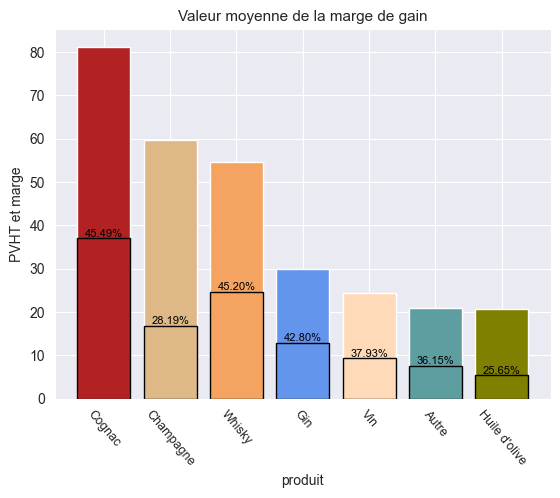

In [1205]:
##########graphe taux de marge avec plt 
sns.set_style("darkgrid", {'axes.grid' : True})
figure =plt.pyplot.bar(marge_df.product_type, marge_df.PVHT_moyen, color=marge_df["product_repres_color"])
graph = plt.pyplot.bar(marge_df.product_type, marge_df["marge€"], color=marge_df["product_repres_color"], edgecolor = "black")
for rect, rect2 in zip(figure,graph):
    height1 = rect.get_height()
    height2 = rect2.get_height()
    height = height2*100/height1
    plt.pyplot.text(rect2.get_x() + rect2.get_width() / 2.0, height2, f'{height:.2f}%', ha='center', va='bottom', fontsize=8, color='black')
plt.pyplot.xticks(rotation = -50, fontsize=9)
plt.pyplot.title("Valeur moyenne de la marge de gain", loc = 'center', fontsize = 11)
plt.pyplot.ylabel("PVHT et marge")
plt.pyplot.xlabel("produit")


In [952]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_type          7 non-null      string
 1   product_repres_color  7 non-null      string
dtypes: string(2)
memory usage: 244.0 bytes


In [951]:
taux_marge_par_produit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_type          7 non-null      object 
 1   taux_moyen            7 non-null      float64
 2   PVHT_moyen            7 non-null      float64
 3   purchase_price_moyen  7 non-null      float64
 4   taux_marge_moyen      7 non-null      float64
 5   marge€                7 non-null      float64
dtypes: float64(5), object(1)
memory usage: 468.0+ bytes


In [1102]:
new_merge = pd.merge(taux_marge_par_produit, new_df, on="product_type", how='inner')

In [1103]:
new_merge = new_merge.sort_values(by="PVHT_moyen", ascending=False)

In [1104]:
##graphe taux de marge avec go
fig7 = go.Figure()
                 
fig7.add_trace(go.Bar(
    x = new_merge["product_type"],
    y = new_merge["PVHT_moyen"],
    name= 'PVHT_moyen',
marker=dict(
        color= new_merge['product_repres_color'])
))
fig7.add_trace(go.Bar(
    x = new_merge["product_type"],
    y = new_merge["marge€"],
    name = 'marge en €',
marker=dict(
        color= new_merge['product_repres_color']    
)))
#fig6.update_xaxes()
fig7.update_layout(
        width=700,
        height=600,
        showlegend=True)
fig7.update_xaxes(title_text="Produit")
fig7.update_yaxes(title_text="PVHT et Marge")
#fig6.update_layout(
#yaxis = dict(
#tickfont = dict(size=9)))

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

In [963]:
############################
# Analyse des correlations #
############################
online_product.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   sku                     714 non-null    object        
 1   total_sales             714 non-null    float64       
 2   tax_status              361 non-null    object        
 3   post_date_gmt           714 non-null    datetime64[ns]
 4   product_type            714 non-null    object        
 5   post_name               714 non-null    string        
 6   post_modified_gmt       714 non-null    datetime64[ns]
 7   post_type               714 non-null    object        
 8   product_id              714 non-null    int64         
 9   onsale_web              714 non-null    int64         
 10  price                   714 non-null    float64       
 11  stock_quantity          714 non-null    int64         
 12  stock_status            714 non-null    object    

In [964]:
online_product.head(10)

,sku,total_sales,tax_status,post_date_gmt,product_type,post_name,post_modified_gmt,post_type,product_id,onsale_web,...,purchase_price,prix_deviation,id_web,ca_par_article,product_repres_color,product_name,duree_stockage_en_mois,valorisation_stock,PVHT,taux_marge_%
0,15298,6.0,taxable,2018-02-08 11:58:52,Vin,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 08:30:29,product,3847,1,...,12.88,-0.304,15298,145.2,darksalmon,pierre-jean-villa-saint-joseph-preface-2018,3.0,206.08,20.17,36.14
1,15296,9.0,taxable,2018-02-08 12:49:41,Vin,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 08:00:17,product,3849,1,...,17.54,0.076,15296,308.7,darksalmon,pierre-jean-villa-saint-joseph-tilde-2017,1.0,175.40,28.58,38.63
2,15300,0.0,NaN,2018-02-08 13:08:36,Vin,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 16:15:03,attachment,3850,1,...,10.64,-0.432,15300,0.0,darksalmon,pierre-jean-villa-croze-hermitage-accroche-coe...,NaN,0.00,17.33,38.60
3,19814,12.0,NaN,2018-02-09 13:01:05,Vin,pierre-jean-villa-igp-gamine-2018,2020-01-04 15:36:01,attachment,4032,1,...,6.92,-0.684,19814,169.2,darksalmon,pierre-jean-villa-igp-gamine-2018,2.0,179.92,11.75,41.11
4,19815,3.0,NaN,2018-02-12 08:04:37,Vin,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 15:36:10,attachment,4039,1,...,23.77,0.516,19815,138.0,darksalmon,pierre-jean-villa-cote-rotie-carmina-2017,1.0,71.31,38.33,37.99
5,15303,7.0,taxable,2018-02-12 08:13:35,Vin,pierre-jean-villa-saint-joseph-saut-ange-2018,2019-11-02 12:25:07,product,4040,1,...,18.25,0.076,15303,240.1,darksalmon,pierre-jean-villa-saint-joseph-saut-ange-2018,2.0,219.00,28.58,36.14
6,14975,6.0,taxable,2018-02-12 08:45:14,Vin,pierre-gaillard-condrieu-2018,2020-08-14 16:15:02,product,4041,1,...,17.57,0.016,14975,196.2,darksalmon,pierre-gaillard-condrieu-2018,2.0,210.84,27.25,35.52
7,16042,8.0,taxable,2018-02-12 08:54:27,Vin,pierre-gaillard-cornas-2017,2020-08-14 08:15:02,product,4042,1,...,15.48,-0.041,16042,249.6,darksalmon,pierre-gaillard-cornas-2017,2.0,232.20,26.00,40.46
8,14980,0.0,taxable,2018-02-12 09:03:05,Vin,pierre-gaillard-cote-rotie-esprit-blond-2017,2020-08-24 12:00:03,product,4043,1,...,29.45,1.043,14980,0.0,darksalmon,pierre-gaillard-cote-rotie-esprit-blond-2017,NaN,0.00,50.00,41.10
9,16041,3.0,taxable,2018-02-12 09:09:03,Vin,pierre-gaillard-cote-rotie-2018,2020-08-03 07:55:03,product,4045,1,...,22.01,0.388,16041,127.8,darksalmon,pierre-gaillard-cote-rotie-2018,2.0,110.05,35.50,38.00


In [965]:
#Création d'un heatmap de correlation avec les variables stock, sales et price
corr = online_product.iloc[:, [1,10,11, 13, 21, 22]]


In [966]:
corr.head()

,total_sales,price,stock_quantity,purchase_price,PVHT,taux_marge_%
0,6.0,24.2,16,12.88,20.17,36.14
1,9.0,34.3,10,17.54,28.58,38.63
2,0.0,20.8,0,10.64,17.33,38.60
3,12.0,14.1,26,6.92,11.75,41.11
4,3.0,46.0,3,23.77,38.33,37.99


Text(0.5, 1.0, 'Correlation Heatmap')

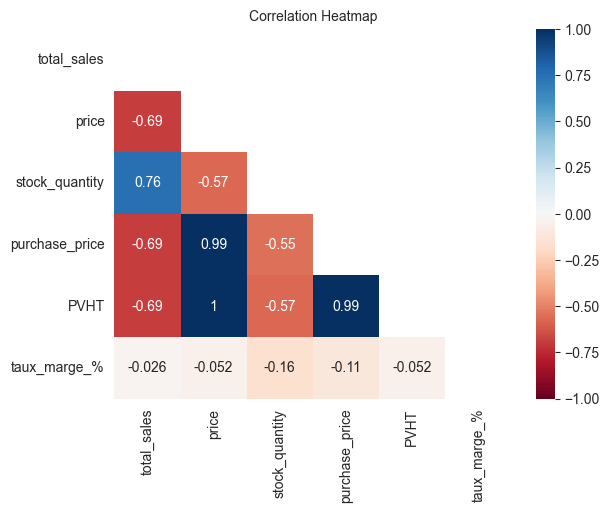

In [1133]:
sns.set_style("whitegrid", {'axes.grid' : False})
mask = np.triu(np.ones_like(corr.corr(), dtype=bool))
heatmap = sns.heatmap(corr.corr(method= 'spearman', numeric_only= True), vmin=-1, vmax=1, annot=True, cmap='RdBu', mask=mask)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10})



In [ ]:
#Que peut-on conclure des correlations ?

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [979]:
online_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   sku                     714 non-null    object        
 1   total_sales             714 non-null    float64       
 2   tax_status              361 non-null    object        
 3   post_date_gmt           714 non-null    datetime64[ns]
 4   product_type            714 non-null    object        
 5   post_name               714 non-null    string        
 6   post_modified_gmt       714 non-null    datetime64[ns]
 7   post_type               714 non-null    object        
 8   product_id              714 non-null    int64         
 9   onsale_web              714 non-null    int64         
 10  price                   714 non-null    float64       
 11  stock_quantity          714 non-null    int64         
 12  stock_status            714 non-null    object    

In [982]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu avec les équipes.
online_product_excel = online_product[['id_web', 'product_id', 'product_type',
                                       'post_name', 'total_sales', 'tax_status',
                                       'post_date_gmt','post_modified_gmt', 'post_type',
                                       'stock_quantity', 'stock_status','price', 'PVHT', 'purchase_price',
                                       'ca_par_article', 'duree_stockage_en_mois','taux_marge_%'
                                       ]]  
online_product_excel.to_excel('/Users/helmisaddem/Downloads/Data-Bottleneck/web.xlsx')